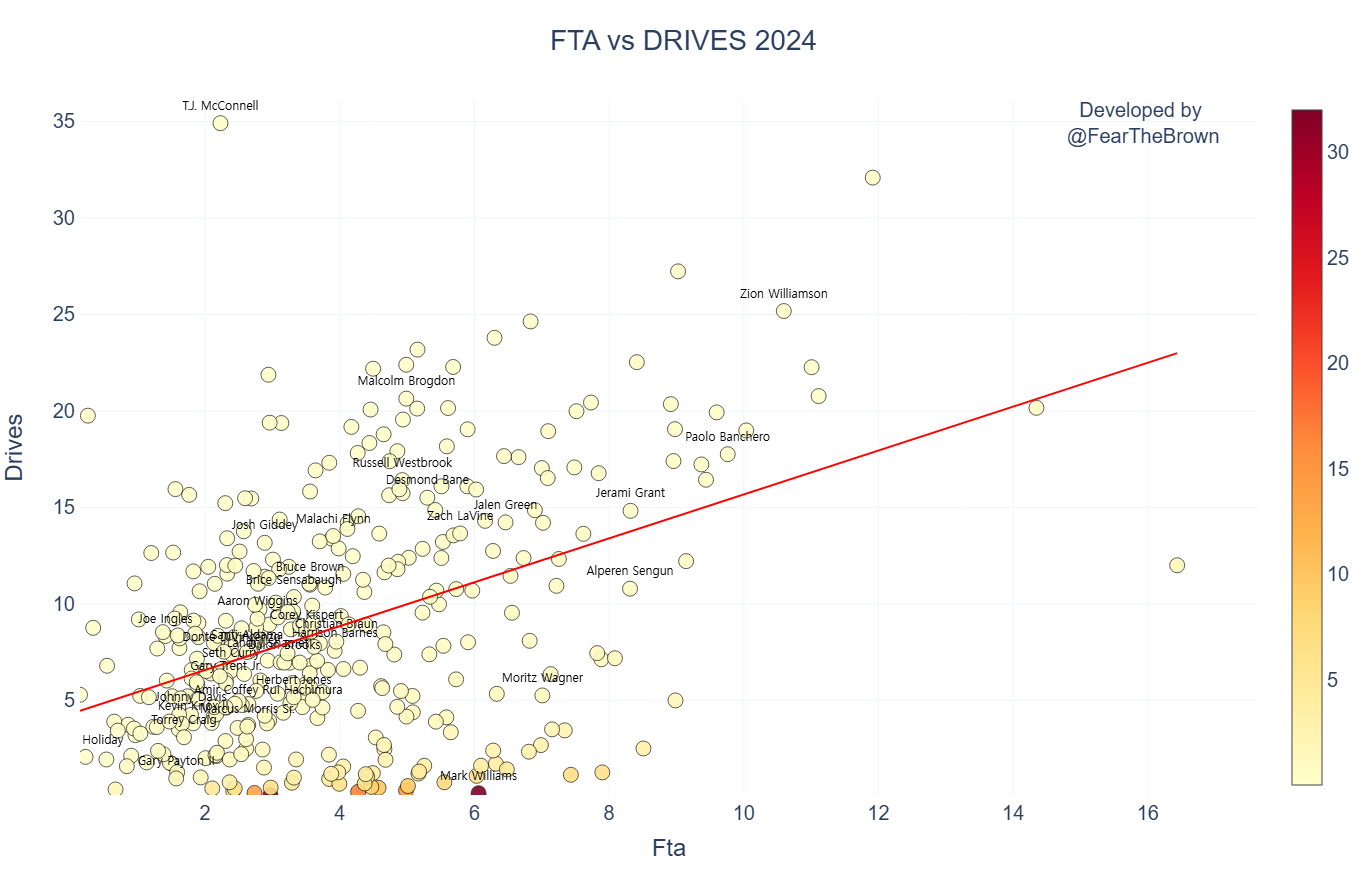

In [17]:
import pandas as pd
import requests
import plotly.graph_objects as go
import math
from scipy import stats
import string
import numpy as np
import time
from scipy.stats import zscore
import sys
import os
import glob
import statsmodels.api as sm

from nba_api.stats.static import players,teams

start_time = time.time()
directory = "data/2025"

# Use glob to find all CSV files in the directory
csv_files = glob.glob(os.path.join(directory, "*.csv"))
def graph_scatter(column1,column2,year,ps = False,mp=50):
   

   
    df = pd.read_csv('year_totals/'+str(year)+'.csv')
    df =df[df.MIN>500]
    team_list= {}
    full_name = {}
    nba_teams = teams.get_teams()
    for org in nba_teams:
        team_list[org['abbreviation']] = org['id']
        full_name[org['abbreviation']] = org['full_name']


    df['name']=df['PLAYER_NAME']
    df['PLAYER_NAME'] = [
        name if i % 10 == 0 else ''
        for i, name in enumerate(df['PLAYER_NAME'])
    ]

    


    hover_text = (
        "Player: " + df["name"] +
        "<br>Passes: " + df[column1].round(1).astype(str) +
        "<br>Potential Assists: " + df[column2].round(1).astype(str) 
    )
    '''
    if player.upper() not in team_list.keys():
        player =df[df['nba_id']==player_id]['Name'].iloc[0]

        df['opa']=.7
      
        df.loc[df['nba_id']==player_id, 'opa'] = 1
    
        df.loc[df['nba_id']!=player_id, 'Name'] = ''
        df['size'] = 0
        df.loc[df['nba_id']==player_id, 'size'] = 3
        title=player.title()

    else:
    
        player = player.upper()
        team_id = int(team_list[player])
        df['team_id'] = df['team_id'].astype(int)
        df['opa']=.7
      
        df.loc[df['team_id']==team_id, 'opa'] = 1
    
        df.loc[df['team_id']!=team_id, 'Name'] = ''
        df['size'] = 0
        df.loc[df['team_id']==team_id, 'size'] = 3

        title = full_name[player.upper()]
    '''

    df['opa']=.9
    df['size']=.7
    df[column1]=100*df[column1]/df.POSS
    df[column2]=100*df[column2]/df.POSS
     

    
    x_min = df[column1].min()
    x_max = df[column1].max()
    y_min= df[column2].min()
    y_max= df[column2].max()


    fig =go.Figure()
    fig.add_trace(go.Scatter(
        y=df[column2],
        x=df[column1],
        mode='markers+text',
        name='data',
        text=df['PLAYER_NAME'],
        hovertext=hover_text,

        textposition="top center",
        showlegend=False,
        marker=dict(
            colorscale="YlOrRd",
            
            color=df[column1] / df[column2],
            opacity=df['opa'],
            line=dict(
                color='black',
                width=df['size']  # Use the 'size' column to set the outline width
            ),
            colorbar=dict(
                title_side='right'
            ),
            
            size=15
        ),
        textfont=dict(
            family="Malgun Gothic",  # Change font family here
            size=12,         # Adjust font size as needed
            color="black"     # Set font color
        )
    ))

    fig.update_xaxes(title_text = column1.title(),showline=True,  gridcolor='#f2f5fa' )
    fig.update_yaxes(title_text = column2.title(),showline=True,gridcolor='#f2f5fa')
    y=df[column2]
    x=df[column1]
    X = sm.add_constant(x)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    trendline = model.predict(X)

# Create the trendline plot
    trendline_plot = go.Scatter(
        x=x,
        y=trendline,
        mode='lines',
        name='Trendline',
        line=dict(color='red'),
        showlegend=False
    )





# Add the trendline to the existing figure
    fig.add_trace(trendline_plot)
    

    fig.update_layout(
        width = 1225,
        height = 875,
        xaxis_range = [x_min,x_max+1.2],
        yaxis_range = [y_min,y_max+1.2] ,
        title = column1 +' vs ' +column2 +' '+ str(year),
        title_x=.5,
        autosize=True,
        paper_bgcolor='#FFFFFF',
        plot_bgcolor='#FFFFFF',
                        
        font=dict(
            family="Arial",
            size=20,
            color='#2A3F5F'
        ),
                       
        
        annotations=[
        go.layout.Annotation(
            showarrow=False,
            text='Developed by <br>@FearTheBrown',
            y=y_max,
            x=x_max- .5
 
            
        ),
        go.layout.Annotation(
            showarrow=False,
            text='Automated by <br>@GabeLeftBrain',
            y=y_max,
            x=0
 
            
        )
        ]
    )  
    return fig
fig=graph_scatter('FTA','DRIVES',2024)
fig.show()